In [88]:
import csv 
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}



plt.rc('font', **font) 

G0 = nx.read_weighted_edgelist("/home/achiso/MATH27/4932.protein.links.v12.0.txt",comments="#",nodetype=str) #Delete the header first or this might not work!
G0 

#G_1 = nx.read_weighted_edgelist("/home/achiso/MATH27/Sec.txt" , comments="#" , nodetype=str) 
#G_1 

In [3]:
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

print("( O v O)b") 

( O v O)b


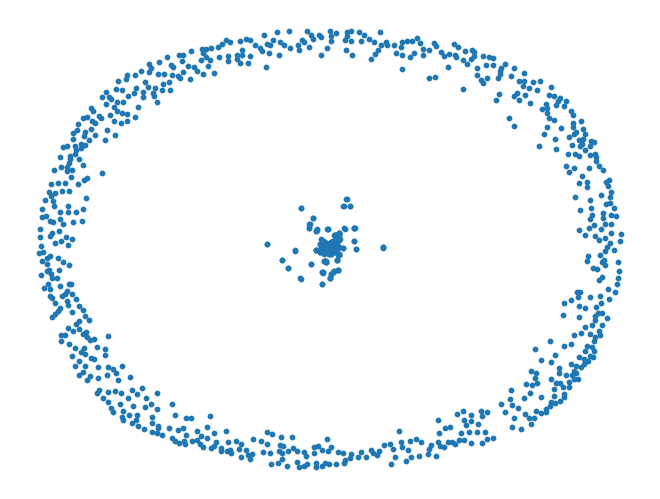

In [4]:
nx.draw(G0,node_size = 10)

In [5]:

print(G0.number_of_nodes())
largest_cc = max(nx.connected_components(G0) , key=len) 
Gc = G0.subgraph(largest_cc) 
print(Gc.number_of_nodes()) 

6538
5697


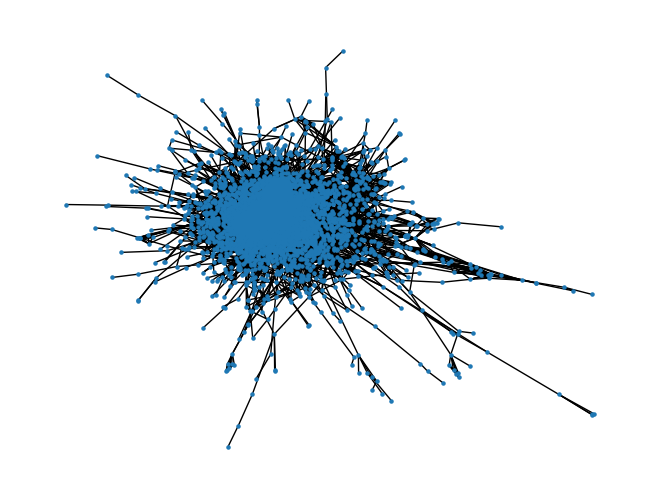

In [6]:
nx.draw(Gc , node_size = 5) 

In [7]:
commus = nx.community.label_propagation_communities(Gc) 
print(type(commus))
print(len(commus))

<class 'dict_values'>
334


In [8]:

modularity_v1 = nx.community.modularity(Gc , commus) 

print("modularity :" , modularity_v1) 


modularity : 0.5368602914379882


In [9]:
G = nx.Graph(Gc) 
for i in commus : 
    if len(i) < 11 : 
        for ii in i : 
            G.remove_node(ii) 
print("|G0| :" , G0.number_of_nodes()) 
print("|Gc| :" , Gc.number_of_nodes()) 
print("|G| :" , G.number_of_nodes()) 
newer_commus = nx.community.label_propagation_communities(G) 
modularity_v2 = nx.community.modularity(G , newer_commus) 

print("modularity :" , modularity_v2) 

|G0| : 6538
|Gc| : 5697
|G| : 4637
modularity : 0.544733466438132


In [10]:
tmp_maxi = 0 
for i in newer_commus : 
    if len(i) > tmp_maxi : 
        tmp_maxi = len(i) 
sizes = (tmp_maxi+1)*[0] 
print("max commus size:" , tmp_maxi) 


max commus size: 1002


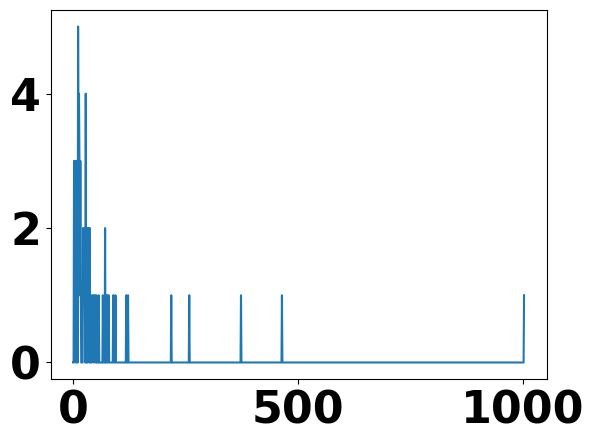

In [11]:

xAxis = [] 
for i in newer_commus : 
    sizes[len(i)] += 1 

for i in range(tmp_maxi+1) : 
    xAxis.append(i) 

plt.plot(xAxis , sizes) 


In [12]:

ccolours_list = ["#00b4d9" , "#4bf542" , "#ff0829" , "#1500ff" , "#f7f302" , "#fa7107" , "#f505cd" , "#9d05f5" , "#fcd305"] 

tmp_c = 0 
tmp_rcommu = 0 



for i in newer_commus : 
    for ii in i : 
        if ii == "4932.YMR190C" : 
            print(len(i) , "@" , tmp_rcommu) 
#            print(i) 
            break 
    tmp_rcommu += 1 
tmp_c = 0 
raw_tar_commu = 0 
for i in newer_commus : 
    if tmp_c == 15 :  
        raw_tar_commu = i 
        break 
    tmp_c += 1 


464 @ 15


In [13]:
tar_commu = nx.subgraph(G , raw_tar_commu) 

tar_degCentra = nx.degree_centrality(tar_commu) 
print(len(tar_degCentra)) 

tar_btweenCentra = nx.betweenness_centrality(tar_commu) 
print(len(tar_btweenCentra)) 



464
464


In [14]:
#print(tar_degCentra["4932.YMR190C"]) 
print("//////////// BTWEEN CENTRA /////////////\n[ 4932.YMR190C |" + str(tar_btweenCentra["4932.YMR190C"]) + "]") 

tmp_c = 0 
for i in tar_btweenCentra : 
    if tar_btweenCentra[i] > tar_btweenCentra["4932.YMR190C"] : 
        tmp_c += 1 
        print(i , "-->" , tar_btweenCentra[i]) 
print("\n#" + str(tmp_c + 1)) 


//////////// BTWEEN CENTRA /////////////
[ 4932.YMR190C |0.04194815379384563]
4932.YER095W --> 0.061669021276736215
4932.YBR160W --> 0.17836786007675412
4932.YML032C --> 0.04801466461521813

#4


In [15]:

print("//////////// DEG CENTRA /////////////\n[ 4932.YMR190C |" + str(tar_degCentra["4932.YMR190C"]) + "]") 
#print("[ 4932.YMR190 |" + str(tar_btweenCentra["4932.YMR190C"]) + "]") 

tmp_c = 0 
for i in tar_degCentra.values() : 
    if i > tar_degCentra["4932.YMR190C"] : 
        tmp_c += 1 
        print(i) 
print("\n#" + str(tmp_c + 1)) 


//////////// DEG CENTRA /////////////
[ 4932.YMR190C |0.26133909287257023]
0.2786177105831534
0.3326133909287257
0.2699784017278618

#4


In [16]:

print("///////////// CLOSNS CENTRA //////////////\n[ 4932.YMR190C |" + str(nx.closeness_centrality(tar_commu , "4932.YMR190C")) + "]") 

tmp_c = 0 
for i in tar_commu : 
    if nx.closeness_centrality(tar_commu , i) > nx.closeness_centrality(tar_commu , "4932.YMR190C") : 
        tmp_c += 1 
        print(i , ":" , nx.closeness_centrality(tar_commu , i)) 

print("\n#" + str(tmp_c + 1)) 


///////////// CLOSNS CENTRA //////////////
[ 4932.YMR190C |0.5358796296296297]
4932.YER095W : 0.5408878504672897
4932.YBR160W : 0.5765877957658779

#3


In [17]:
def top_btween_member(Gin , show=0) : 
    tmp_btweenCentra = nx.betweenness_centrality(Gin) 
    trig = 0 
    recov = "" 
    recoc = -1 
    for i in tmp_btweenCentra : 
        if trig == 0 : 
            trig = 1 
            recov = i 
            recoc = tmp_btweenCentra[i] 
            top_btweens_reco    
            continue 
        if tmp_btweenCentra[i] > recoc : 
            recov = i 
            recoc = tmp_btweenCentra[i] 
    if show : 
        print("[ " + recov , "|" + str(recoc) + "]") 
    return [recov , recoc] 
    #if recoc == 0 : 
    #    print(len(Gin)) 

In [18]:
tmp_c = 0 
top_btweens_reco = []   # [ [commu , 1st] ... ] 

for i in newer_commus : 
    if 222 < len(i) : 
        print("|{" , tmp_c , "}| =" , len(i)) 
        #tmp_c += 1 
        #continue 
    re = top_btween_member(nx.subgraph(G , i)) 
    tmp_c += 1 
    top_btweens_reco.append([i , re[0]]) 


|{ 0 }| = 258
|{ 1 }| = 1002
|{ 6 }| = 373
|{ 15 }| = 464


4637
464


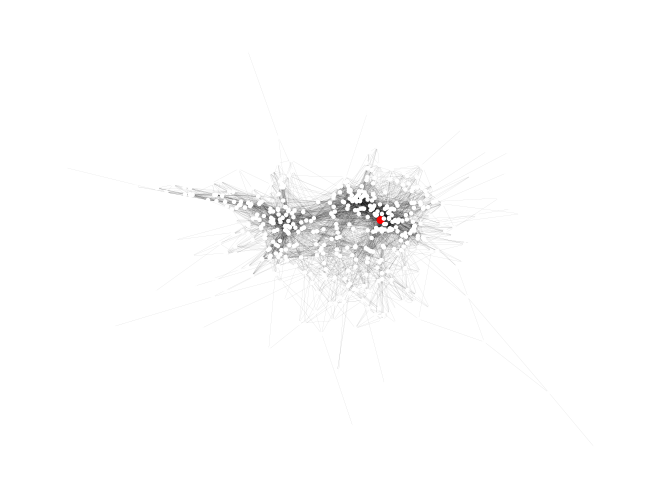

In [19]:
print(len(G)) 
print(len(tar_commu)) 

ccmap = [] 
nsmap = [] 
for i in tar_commu : 
    if i == "4932.YMR190C" : 
        ccmap.append("red") 
        nsmap.append(22) 
    else : 
        ccmap.append("white") 
        nsmap.append(5) 

nx.draw(tar_commu , node_size=nsmap , node_color=ccmap , width=0.022 , edge_color="black") 


#SGS1 in the located community 

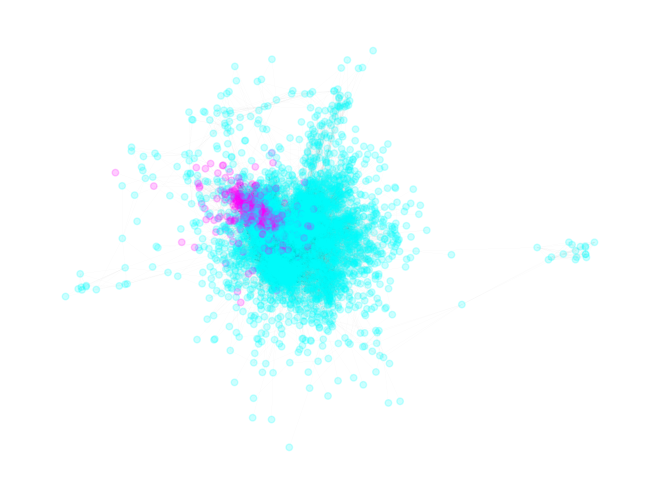

In [20]:
ccmap = [] 
for i in G : 
    if i in tar_commu : 
        ccmap.append("magenta") 
    else : 
        ccmap.append("cyan") 
nx.draw(G , node_color=ccmap , node_size=22 , width=0.022 , alpha=0.2) 

#the target community in the modified centre chunk 

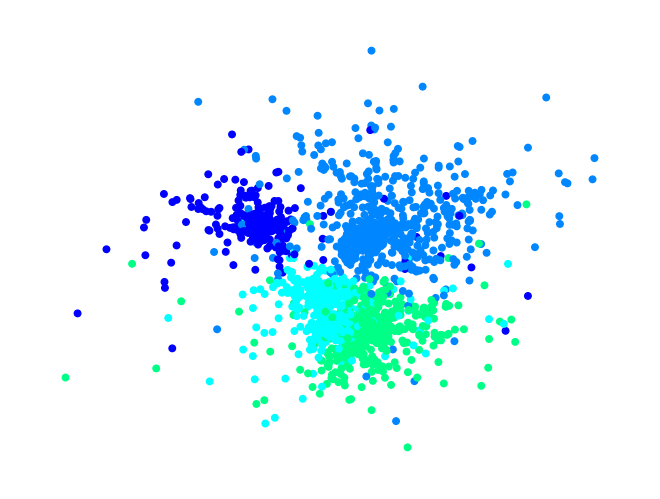

In [21]:
tmp_c = 0 
raw_commu_box = [] 

for i in newer_commus : 
    if len(i) > 222 : 
        raw_commu_box.append([tmp_c , i]) 
    tmp_c += 1 

box = [] 
for i in raw_commu_box : 
    for ii in i[1] : 
        box.append(ii) 
    
tmp_sG1 = nx.subgraph(G , box)  


ccolours = ["#0000ff" , "#0087ff" , "#00ffff" , "#00ff87" , "#00ff00" , "#87ff00" , "#ffff00" , "#ff8700" , "#ff0000" , "#ff0087" , "#ff00ff" , "#8700ff"] 
ccmap = [] 
for i in tmp_sG1 : 
    if i in raw_commu_box[0][1] : 
        ccmap.append(ccolours[0]) 
    elif i in raw_commu_box[1][1] : 
        ccmap.append(ccolours[1]) 
    elif i in raw_commu_box[2][1] : 
        ccmap.append(ccolours[2]) 
    elif i in raw_commu_box[3][1] : 
        ccmap.append(ccolours[3]) 
    else : 
        print("( O _ O) { ??? )") 
        break 

nx.draw(tmp_sG1 , node_color=ccmap , node_size=22 , width=0.0 , alpha=1) 

In [22]:
def s_CommuNber(a_raw_commu , commusList=newer_commus) : 
    temp = 0 
    for i in commusList : 
        if a_raw_commu == i : 
#            print("@" , temp) 
            return temp 
        temp += 1 
    

In [23]:
def CommuAt(n , commusList=newer_commus) : 
    temp = 0 
    for i in newer_commus : 
        if temp == n : 
            return i 
        temp += 1 

In [24]:
def whe_link(node_name , a_raw_commu) : 
    for i in a_raw_commu : 
        if G.has_edge(i , node_name) : 
#            print(i) 
            return True 
    return False 

In [25]:
# for 15 , 
#|newer_commus| = 81 
#print(tmp_c)    print(len(raw_tar_commu)) 

commus_connections = [None]*len(newer_commus) 
#print(len(commus_connections)) 
#print(commus_connections) 

tmp = [0]*81 


for i in raw_tar_commu : 
    for ii in newer_commus : 
        if ii == raw_tar_commu : 
            tmp[s_CommuNber(ii)] = -1 
            continue 
        if whe_link(i , ii) : 
            tmp[s_CommuNber(ii)] += 1 
#commus_connections[15] = [raw_tar_commu , tmp] 



In [127]:
#commus_connections = [[None , None]]*len(newer_commus) 
commus_connections = [] 

tmp_c = 0 
for i in newer_commus : 
    opened_box = [i , None] 
    info_pack = [0]*len(newer_commus) 
    for ii in i : 
        for iii in newer_commus : 
            if iii == i : 
                info_pack[s_CommuNber(iii)] = -1 
                continue 
            if whe_link(ii , iii) : 
                info_pack[s_CommuNber(iii)] += 1 
    closed_box = [i , info_pack]
    commus_connections.append(closed_box) 
    tmp_c += 1 
    print(str(tmp_c) + " packed" , end="\r") 



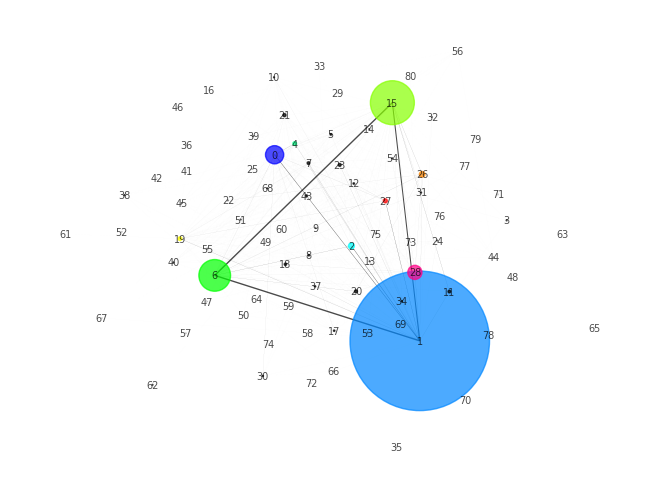

In [27]:
#for i in commus_connections : 
#    print(s_CommuNber(i[0])) 
#print(len(G))   //4637 


commu_G = nx.Graph() 
tmp_size = [] 
tmp_colour = [] 
tmp_width = [] 

for i in newer_commus : 
    #commu_G.add_node(str(s_CommuNber(i))+"_Commu") 
    commu_G.add_node(s_CommuNber(i)) 
for i in commus_connections : 
    for ii in range(len(i[1])) : 
        if i[1][ii] > 0 : 
            commu_G.add_edge(s_CommuNber(i[0]) , ii , weight=i[1][ii]) 

colour_ptr = 0 
for i in commu_G : 
#    print(len(CommuAt(i)) , "\t" , len(CommuAt(i))/len(G)) 
    #tmp_size.append(2**(13)*len(CommuAt(i))/len(G)) 
    if len(CommuAt(i)) > 87 : 
        tmp_colour.append(ccolours[colour_ptr]) 
        colour_ptr += 1 
    else : 
        tmp_colour.append("black") 
    tmp_n = 100*(len(CommuAt(i))/len(G))
    tmp_size.append(tmp_n**(3))  
#print(tmp_size) 
maxi_weight = -1 
for i in commu_G.edges(data=True) : 
    if i[2]["weight"] > maxi_weight : 
        maxi_weight = i[2]["weight"] 

for i in commu_G.edges(data=True) : 
    tmp_width.append((i[2]["weight"]/maxi_weight)**(1.87)) 


pos = None 

#pos = nx.bfs_layout(commu_G , 0) 
#pos = nx.spectral_layout(commu_G) 
##pos = nx.spring_layout(commu_G) 
##pos = nx.circular_layout(commu_G) 
##pos = nx.shell_layout(commu_G) 
##pos = nx.spring_layout(commu_G) 
pos = nx.kamada_kawai_layout(commu_G) 
##pos = nx.spiral_layout(commu_G) 

nx.draw(commu_G , pos=pos , with_labels=1 , font_size = 7 , width=tmp_width , alpha = 0.7 , node_color=tmp_colour , node_size=tmp_size) 

#recall SGS1 lives in 15_Commu 

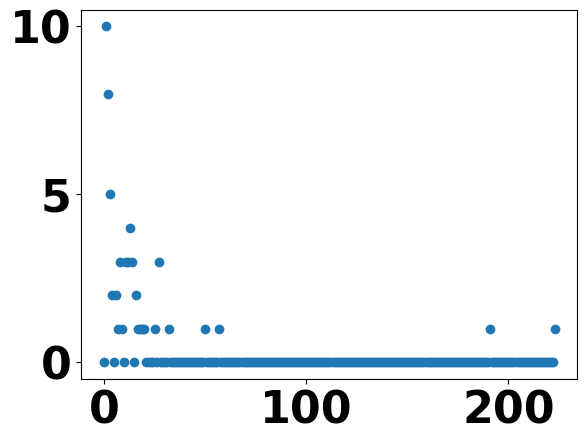

In [33]:
weight_ns = [] 
for i in commu_G.edges(data=True) : 
    if i[0] == s_CommuNber(raw_tar_commu) or i[1] == s_CommuNber(raw_tar_commu) : 
        weight_ns.append(i[2]["weight"]) 
weight_ns.sort() 

weight_distri = [0]*(max(weight_ns)+1) 
for i in weight_ns : 
    weight_distri[i] += 1 

x_axis = [i for i in range(max(weight_ns)+1)] 



plt.scatter(x_axis , weight_distri) 
#plt.hist(weight_distri) 



#weight counter 

In [34]:
def weight_between(u , v , network=commu_G) : 
    for i in network.edges(data=True) : 
        if (i[0] == u and i[1] == v) or (i[0] == v and i[1] == u): 
            return i[2]["weight"] 
    print("( O _ O) { ??? )") 
    return -1 

373
1002
[ DONE ]


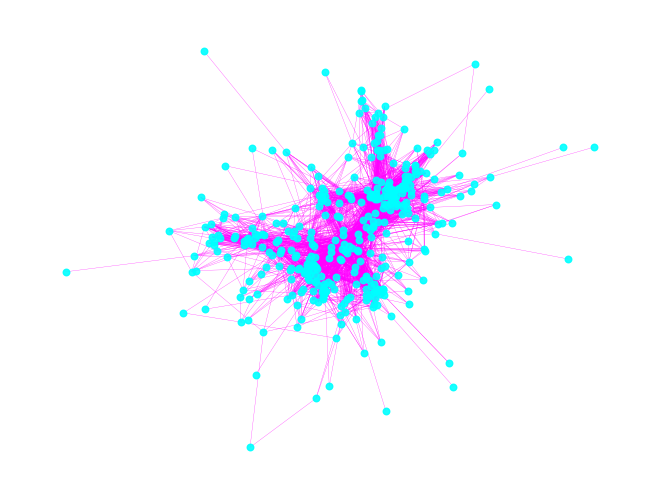

In [35]:
#### 1_Commu & 6_Commu ################# 

#print(weight_between(15,6)) 
#print(weight_between(1,15)) 
print(len(CommuAt(6))) 
print(len(CommuAt(1))) 


######## 6_Commu ######## 
SIX_commu = nx.subgraph(G , CommuAt(6)) 
nx.draw(SIX_commu , node_size=22 , node_color="cyan", edge_color="magenta" , alpha=0.9 , width=0.2) 

print("[ ... ]" , end='\r')
SIX_commu_btweenCentra = nx.betweenness_centrality(SIX_commu) 
print("[ DONE ]") 

In [56]:

#for i in SIX_commu_btweenCentra : 
#    print(SIX_commu_btweenCentra[i]) 
tmp_L1 = [] 
tmp_L2 = [] 
SIX_commu_BtweenCentraPack = [] 

for i in SIX_commu_btweenCentra : 
    tmp_L1.append(SIX_commu_btweenCentra[i]) 
    tmp_L2.append(i) 
tmp_L1, tmp_L2 = zip(*sorted(zip(tmp_L1, tmp_L2)))   ### Thanks to https://stackoverflow.com/questions/9764298/given-parallel-lists-how-can-i-sort-one-while-permuting-rearranging-the-other 

print("\t\t\t     BtweenCentra\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~") 
for i in range(6) : 
    print("#" + str(1+i) , ":" , tmp_L2[-(1+i)] , "\t" , tmp_L1[-(1+i)]) 
    SIX_commu_BtweenCentraPack.append(tmp_L2[-(1+i)]) 

print(SIX_commu_BtweenCentraPack) 

			     BtweenCentra
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#1 : 4932.YBR010W 	 0.13186597711815606
#2 : 4932.YBR009C 	 0.08005129251824929
#3 : 4932.YNL031C 	 0.0698629152091471
#4 : 4932.YER148W 	 0.06843277759088467
#5 : 4932.YPL129W 	 0.05696469153171022
#6 : 4932.YDL140C 	 0.04181055204785625
['4932.YBR010W', '4932.YBR009C', '4932.YNL031C', '4932.YER148W', '4932.YPL129W', '4932.YDL140C']


In [78]:
#SIX_commu_KatzCentra = nx.katz_centrality(SIX_commu) 
SIX_commu_eigenCentra = nx.eigenvector_centrality(SIX_commu , max_iter=7777) 

tmp_L1 = [] 
tmp_L2 = [] 
SIX_commu_EigenCentraPack = [] 

for i in SIX_commu : 
    tmp_L2.append(i) 
    tmp_L1.append(SIX_commu_eigenCentra[i]) 
    
tmp_L1, tmp_L2 = zip(*sorted(zip(tmp_L1, tmp_L2)))   ### Thanks to https://stackoverflow.com/questions/9764298/given-parallel-lists-how-can-i-sort-one-while-permuting-rearranging-the-other 

print("\t\t\t    eigenCentra\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~") 
for i in range(6) : 
    print("#" + str(1+i) , ":" , tmp_L2[-(1+i)] , "\t" , tmp_L1[-(1+i)]) 
    SIX_commu_EigenCentraPack.append(tmp_L2[-(1+i)]) 

print(SIX_commu_EigenCentraPack) 

			    eigenCentra
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#1 : 4932.YDL140C 	 0.1555777294503691
#2 : 4932.YBR154C 	 0.15215027722953237
#3 : 4932.YER148W 	 0.1521401500464763
#4 : 4932.YPR187W 	 0.14840413209181236
#5 : 4932.YHR143W-A 	 0.14777867488971555
#6 : 4932.YOR210W 	 0.14777404163841873
['4932.YDL140C', '4932.YBR154C', '4932.YER148W', '4932.YPR187W', '4932.YHR143W-A', '4932.YOR210W']


In [72]:
tmp_L1 = [] 
tmp_L2 = [] 
SIX_commu_ClosnsCentraPack = [] 

tmp_c = 0
tmp = ['.' , 'o' , 'O' , 'o'] 
for i in SIX_commu : 
    tmp_L2.append(i) 
    tmp_L1.append(nx.closeness_centrality(SIX_commu , i)) 
    tmp_c += 1 
    print(tmp[tmp_c%len(tmp)] , str(tmp_c) + "/" + str(len(SIX_commu)) , end='\r') 
print("( O v O)b") 
tmp_L1, tmp_L2 = zip(*sorted(zip(tmp_L1, tmp_L2)))   ### Thanks to https://stackoverflow.com/questions/9764298/given-parallel-lists-how-can-i-sort-one-while-permuting-rearranging-the-other 

print("\t\t\t     ClosnsCentra\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~") 
for i in range(6) : 
    print("#" + str(1+i) , ":" , tmp_L2[-(1+i)] , "\t" , tmp_L1[-(1+i)]) 
    SIX_commu_ClosnsCentraPack.append(tmp_L2[-(1+i)]) 

print(SIX_commu_ClosnsCentraPack) 

( O v O)b
			     ClosnsCentra
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#1 : 4932.YBR010W 	 0.6447140381282496
#2 : 4932.YBR009C 	 0.6169154228855721
#3 : 4932.YNL031C 	 0.6118421052631579
#4 : 4932.YNL030W 	 0.58125
#5 : 4932.YER148W 	 0.5636363636363636
#6 : 4932.YPL129W 	 0.5593984962406015
['4932.YBR010W', '4932.YBR009C', '4932.YNL031C', '4932.YNL030W', '4932.YER148W', '4932.YPL129W']


In [73]:
### 4932.YBR010W  [ ? ] 
### 4932.YNL031C  [ ! ] 

### 4932.YNL030W  [ ? ] 

### 4932.YPL129W  [ ? ] 

In [75]:
#SIX_commu_BtweenCentraPack 
#SIX_commu_EigenCentraPack 
#SIX_commu_ClosnsCentraPack 

tmp_packs = [SIX_commu_BtweenCentraPack , SIX_commu_ClosnsCentraPack , SIX_commu_EigenCentraPack] 

print("Btween\t\tClosns\t\tEigen\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~") 
for i in range(len(SIX_commu_BtweenCentraPack)) : 
    tmp_s = "" 
    for ii in tmp_packs : 
        tmp_s += ii[i] + '\t' 
    print(tmp_s) 


Btween		Closns		Eigen
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4932.YBR010W	4932.YBR010W	4932.YDL140C	
4932.YBR009C	4932.YBR009C	4932.YBR154C	
4932.YNL031C	4932.YNL031C	4932.YER148W	
4932.YER148W	4932.YNL030W	4932.YPR187W	
4932.YPL129W	4932.YER148W	4932.YHR143W-A	
4932.YDL140C	4932.YPL129W	4932.YOR210W	


In [87]:
tar_commu_eigenCentra = nx.eigenvector_centrality(tar_commu , max_iter=777) 

tmp_L1 = [] 
tmp_L2 = [] 
tar_commu_EigenCentraPack = [] 

for i in tar_commu : 
    tmp_L2.append(i) 
    tmp_L1.append(tar_commu_eigenCentra[i]) 
    
tmp_L1, tmp_L2 = zip(*sorted(zip(tmp_L1, tmp_L2)))   ### Thanks to https://stackoverflow.com/questions/9764298/given-parallel-lists-how-can-i-sort-one-while-permuting-rearranging-the-other 

print("///////////// TAR COMMU ///////////////") 
print("\t\t\t    EigenCentra\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~") 
for i in range(6) : 
    print("#" + str(1+i) , ":" , tmp_L2[-(1+i)] , "\t" , tmp_L1[-(1+i)]) 
    tar_commu_EigenCentraPack.append(tmp_L2[-(1+i)]) 

print(tar_commu_EigenCentraPack) 

///////////// TAR COMMU ///////////////
			    EigenCentra
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#1 : 4932.YER095W 	 0.1665226295578608
#2 : 4932.YMR190C 	 0.16273088526357982
#3 : 4932.YML032C 	 0.15743764862601434
#4 : 4932.YOR033C 	 0.14801156707906055
#5 : 4932.YKL113C 	 0.14465840768902272
#6 : 4932.YAR007C 	 0.14418100745686543
['4932.YER095W', '4932.YMR190C', '4932.YML032C', '4932.YOR033C', '4932.YKL113C', '4932.YAR007C']


In [ ]:
## YER095W   [ ? ] 
## YMR190C   [ ? ] 
## YML032C   [ ? ] 
## YOR033C   [ ? ] 
## YKL113C   [ ? ] 
## YAR007C   [ ! ] 

In [101]:
############# CSV ################ 

Essen_list = [] 

with open("EssenProtein_List.csv" , mode ="r")as file : 
  csvFile = csv.reader(file)
  for lines in csvFile:
        Essen_list.append("4932." + lines[1]) 


In [104]:
tmp_c = 0 
for i in G : 
    if i in Essen_list : 
        tmp_c += 1 
print(tmp_c , "/" , len(G)) 
print(tmp_c/len(G)) 

1178 / 4637
0.25404356264826394


In [107]:
tmp_c = 0 
for i in tar_commu : 
    if i in Essen_list : 
        tmp_c += 1 
print(tmp_c) 
print(tmp_c/len(tar_commu)) 

148
0.31896551724137934


305
True


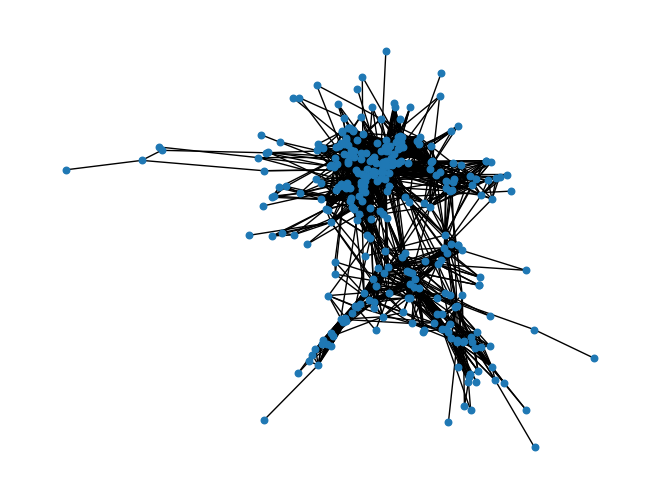

In [125]:
tmp_G = nx.Graph(tar_commu) 


for i in Essen_list : 
    if i in tmp_G : 
        tmp_G.remove_node(i) 

tmp_maxiCC = max(nx.connected_components(tmp_G) , key=len) 
tmp_G = tmp_G.subgraph(tmp_maxiCC) 

print(len(tmp_G)) 
nx.draw(tmp_G , node_size = 22) 

print("4932.YMR190C" in tmp_G) 

In [126]:
for i in commu_G.edges(data=True) : 
    print(i) 

(0, 1, {'weight': 109})
(0, 2, {'weight': 8})
(0, 3, {'weight': 14})
(0, 4, {'weight': 58})
(0, 5, {'weight': 23})
(0, 6, {'weight': 36})
(0, 7, {'weight': 13})
(0, 8, {'weight': 5})
(0, 9, {'weight': 23})
(0, 10, {'weight': 1})
(0, 11, {'weight': 12})
(0, 12, {'weight': 5})
(0, 14, {'weight': 3})
(0, 15, {'weight': 27})
(0, 16, {'weight': 4})
(0, 17, {'weight': 28})
(0, 18, {'weight': 6})
(0, 19, {'weight': 19})
(0, 20, {'weight': 5})
(0, 21, {'weight': 24})
(0, 23, {'weight': 4})
(0, 24, {'weight': 6})
(0, 25, {'weight': 3})
(0, 26, {'weight': 5})
(0, 27, {'weight': 37})
(0, 28, {'weight': 7})
(0, 29, {'weight': 1})
(0, 30, {'weight': 33})
(0, 31, {'weight': 1})
(0, 32, {'weight': 2})
(0, 33, {'weight': 1})
(0, 34, {'weight': 4})
(0, 36, {'weight': 1})
(0, 37, {'weight': 13})
(0, 39, {'weight': 11})
(0, 40, {'weight': 7})
(0, 41, {'weight': 4})
(0, 42, {'weight': 2})
(0, 43, {'weight': 5})
(0, 47, {'weight': 6})
(0, 49, {'weight': 1})
(0, 50, {'weight': 7})
(0, 51, {'weight': 15})
(0

In [ ]:
1/0 

In [ ]:

"""
tmp_c = 0
for i in raw_tar_commu : 
    if G.has_edge(i , "4932.YMR190C") : 
        #print(i) 
        tmp_c += 1 
"""

In [ ]:
"""
for i in range(len(arr_newer_out)) : 
    if i in newer_out[ii] : 
        if ii < len(ccolours_list) - 1 : 
            colour_map.append(ccolours_list[ii]) 
        else : 
            colour_map.append("#000000") 
""" 



In [ ]:
arr_1 = [] 
for i in new_out : 
    arr_1.append(i) 
    
n_arr = [] 
arr_2 = [] 
for i in arr_1 : 
    if len(i) > 33 : 
        arr_2.append(i) 
#plt.hist(n_arr) 
map_arr = [] 
for i in G0 : 
    if i in arr_2[1] : 
        map_arr.append("red") 
    else : 
        map_arr.append("blue") 
    
largest_cc = max(nx.connected_components(G0) , key=len) 
G0 = G0.subgraph(largest_cc) 

#nx.draw(G0, node_color=map_arr, with_labels=False , node_size=9)

In [ ]:
target_sub = G0.subgraph(arr_2[1]) 
print(len(target_sub)) 
print(len(G0)) 

In [ ]:
print(type([{0, 1, 2}, {3, 4, 5}])) 

In [ ]:
print(type(arr_2)) 
print(type(arr_2[0])) 

print(len(arr_2[0])) 
print(arr_2[0])


In [ ]:
nx.community.modularity(G0 , arr_2) 
